In [12]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k

In [13]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [14]:
img_rows, img_cols = 28, 28
 
if k.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  inpx = (1, img_rows, img_cols)
else: 
   x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) 
   x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1) 
   inpx = (img_rows, img_cols, 1) 
  
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 
x_train /= 255
x_test /= 255

In [15]:
y_train = keras.utils.to_categorical(y_train) 
y_test = keras.utils.to_categorical(y_test)

In [16]:
inpx = Input(shape=inpx) 
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx) 
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1) 
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2) 
layer4 = Dropout(0.5)(layer3) 
layer5 = Flatten()(layer4) 
layer6 = Dense(250, activation='sigmoid')(layer5) 
layer7 = Dense(10, activation='softmax')(layer6)

In [17]:
model = Model([inpx], layer7) 
model.compile(optimizer=keras.optimizers.Adadelta(), 
              loss=keras.losses.categorical_crossentropy, 
              metrics=['accuracy']) 
  
history=model.fit(x_train, y_train, epochs=12, batch_size=500, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 128s 2ms/step - loss: 0.7438 - accuracy: 0.7713 - val_loss: 0.2661 - val_accuracy: 0.9248
Epoch 2/12
60000/60000 [==============================] - 128s 2ms/step - loss: 0.2502 - accuracy: 0.9285 - val_loss: 0.1396 - val_accuracy: 0.9610
Epoch 3/12
60000/60000 [==============================] - 127s 2ms/step - loss: 0.1490 - accuracy: 0.9568 - val_loss: 0.0893 - val_accuracy: 0.9742
Epoch 4/12
60000/60000 [==============================] - 127s 2ms/step - loss: 0.1090 - accuracy: 0.9683 - val_loss: 0.0706 - val_accuracy: 0.9787
Epoch 5/12
60000/60000 [==============================] - 127s 2ms/step - loss: 0.0867 - accuracy: 0.9745 - val_loss: 0.0581 - val_accuracy: 0.9827
Epoch 6/12
60000/60000 [==============================] - 127s 2ms/step - loss: 0.0739 - accuracy: 0.9781 - val_loss: 0.0491 - val_accuracy: 0.9844
Epoch 7/12
60000/60000 [==============================] - 127s

In [18]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               1024

In [19]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('loss=', score[0]) 
print('accuracy=', score[1])

loss= 0.030931506870966404
accuracy= 0.9890000224113464


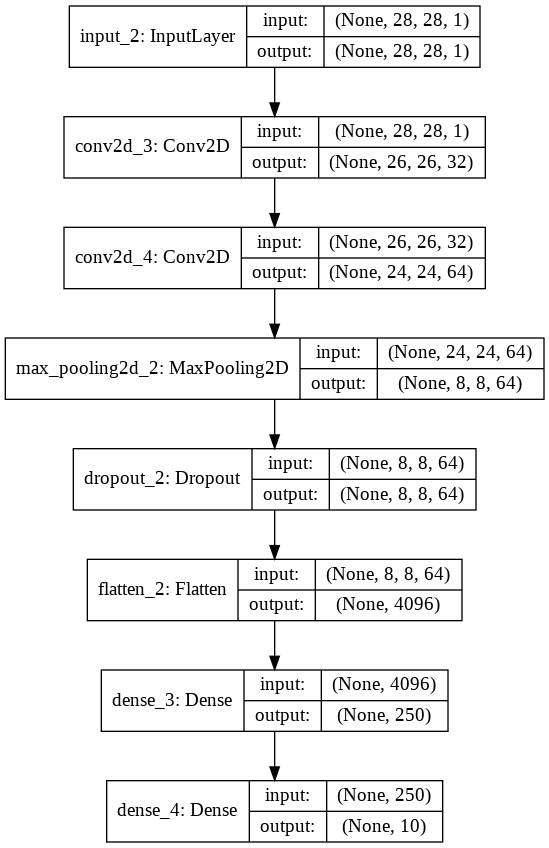

In [24]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical
 
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

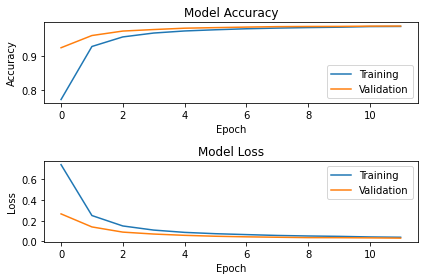

In [21]:
plt.figure(1)
# summarize history for accuracy
 
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
 
# summarize history for loss
 
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
 
plt.tight_layout()
 
plt.show()

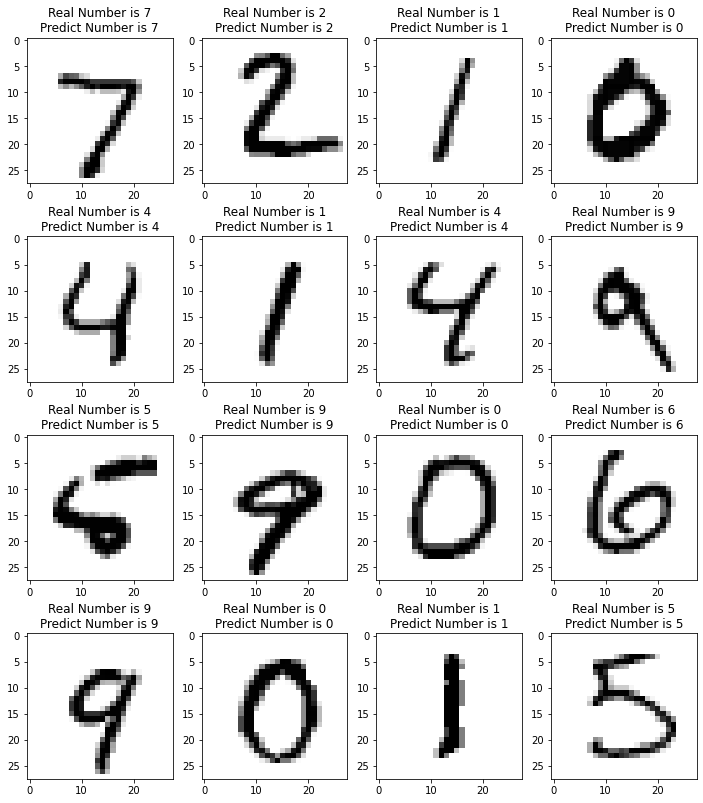

In [22]:
y_pred = model.predict(x_test)
x_test__ = x_test.reshape(x_test.shape[0], 28, 28)
fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");